In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import os

In [2]:
df=pd.read_csv('G-terrorism.csv',encoding='ISO-8859-1')

In [3]:
df.head(20)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
df.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [11]:
df['Killed'].fillna(df['Killed'].fillna(0), inplace=True)  # Fill with mean
df['Wounded'].fillna(df['Wounded'].fillna(0), inplace=True)  # Fill with mean

In [12]:
df

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [13]:
print("Country with the most attacks:",df['Country'].value_counts().idxmax())
print("City:",df['city'].value_counts().index[1])
print("Region:",df['Region'].value_counts().idxmax())
print("Year:",df['Year'].value_counts().idxmax())
print("Month:",df['Month'].value_counts().idxmax())
print("Group:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City: Baghdad
Region: Middle East & North Africa
Year: 2014
Month: 5
Group: Taliban
Most Attack Types: Bombing/Explosion


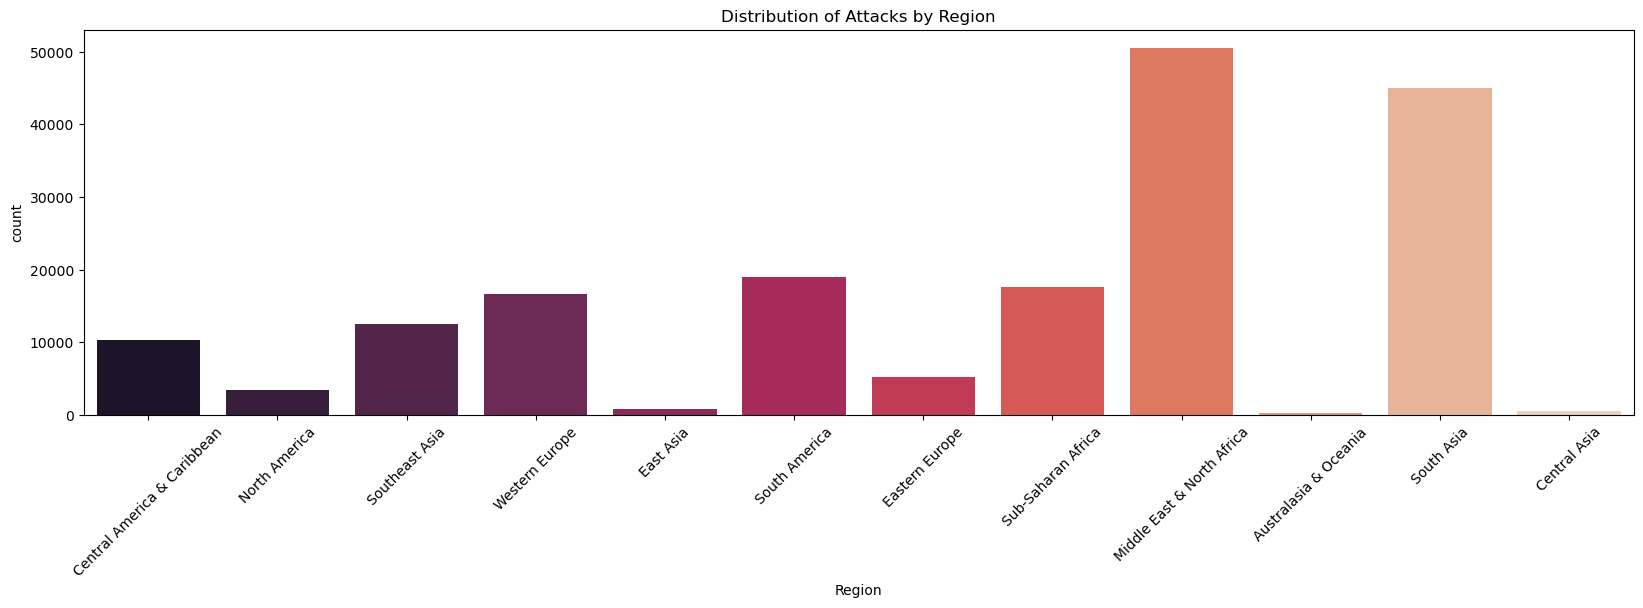

In [44]:
plt.figure(figsize=(20, 5))
colors_rocket = [
    "#000004", "#070b39", "#1c1e6d", "#414387", "#5a60a0",
    "#7577b9", "#8f8fcc", "#a9a8e6", "#c4c6f1", "#dfdffa",
    "#f1ebf6", "#f9f4f8", "#fbebf5", "#f9dbdb", "#f4bccf",
    "#ec90c7", "#e763bc", "#dd3497", "#d7306e", "#ae0e36"
]
sns.countplot(data=df, x='Region',palette=custom_colors)
plt.xticks(rotation=45)
plt.title('Distribution of Attacks by Region')
plt.show()

In [15]:
y_count_years=df['Year'].value_counts().sort_index()
x_year=df['Year'].unique()

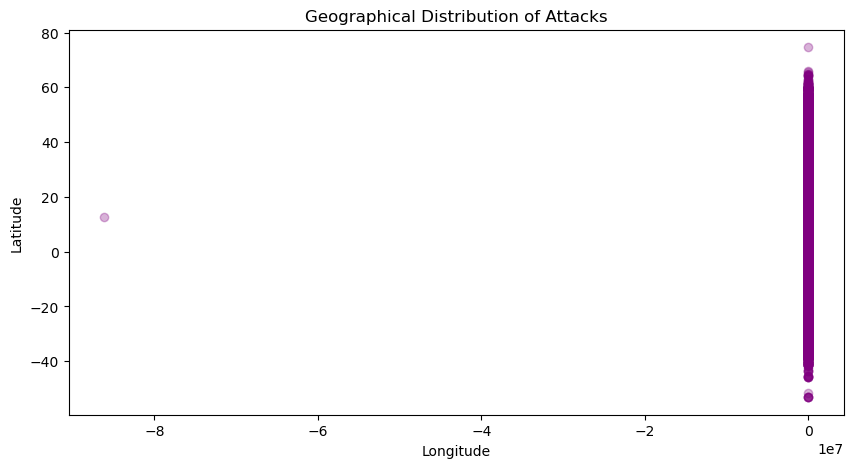

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(df['longitude'], df['latitude'], c='purple', alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Attacks')
plt.show()

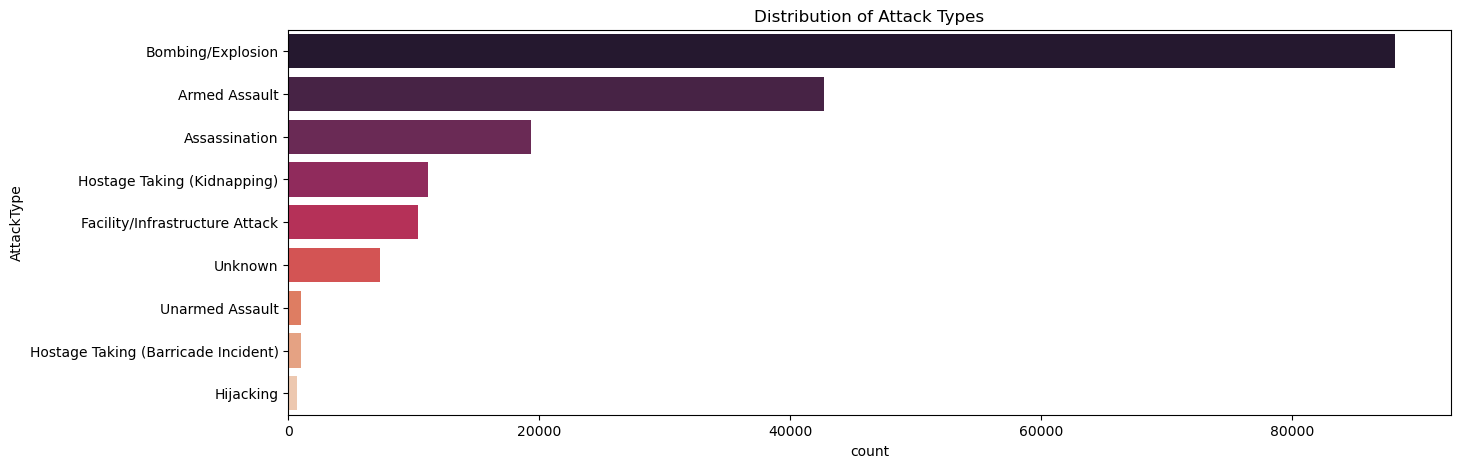

In [18]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, y='AttackType', order=df['AttackType'].value_counts().index, palette='rocket')
plt.title('Distribution of Attack Types')
plt.show()

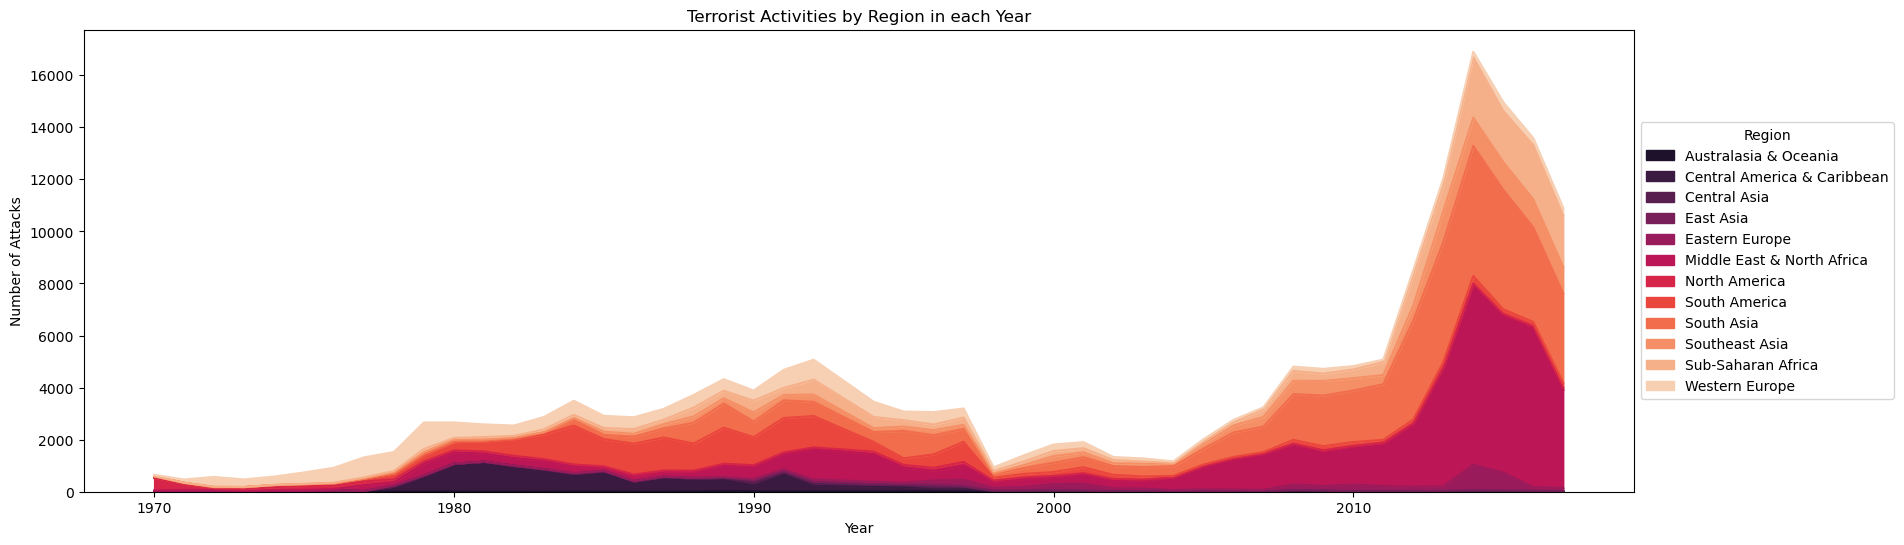

In [56]:
custom_palette = sns.color_palette("rocket", df['Region'].nunique())
custom_colors = custom_palette.as_hex()
ax = pd.crosstab(df.Year, df.Region).plot(kind='area', figsize=(20, 6), color=custom_colors)
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Region', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

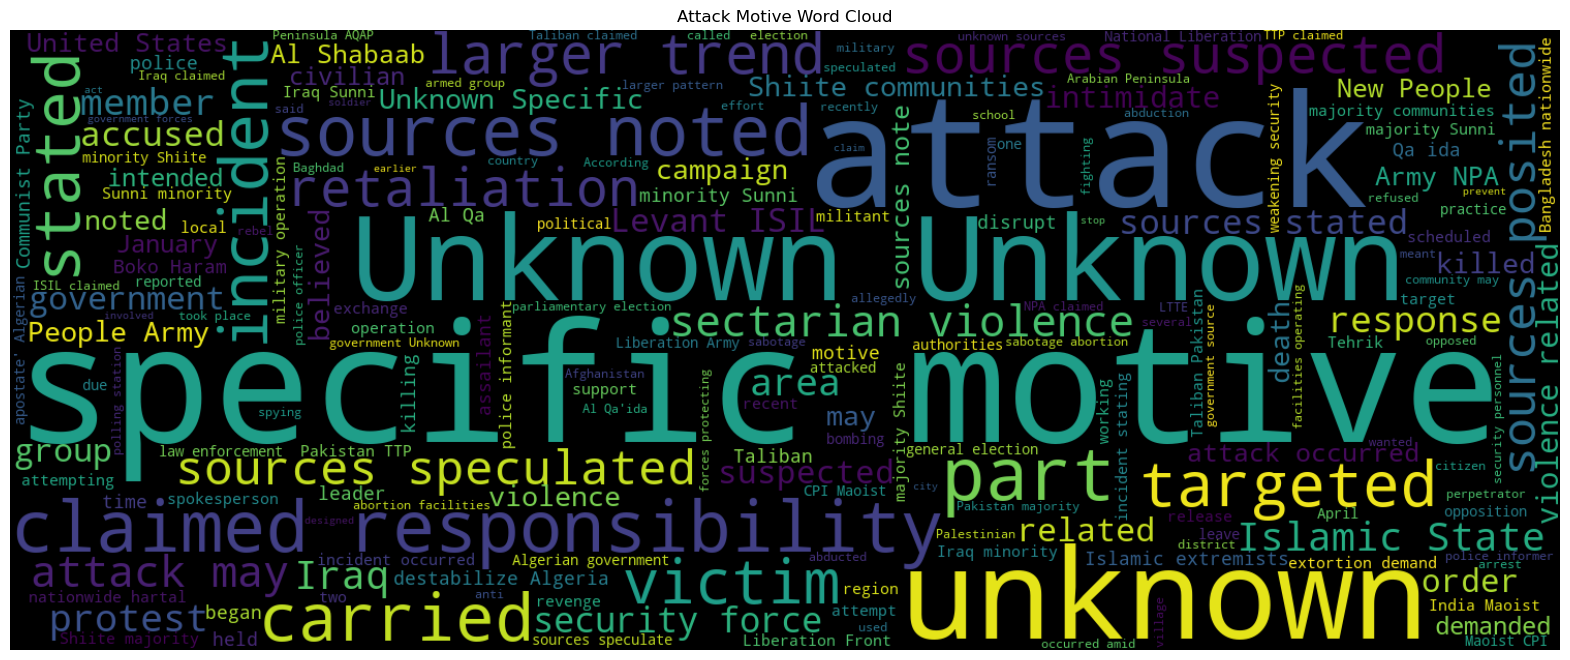

In [20]:
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))
motives_text = ' '.join(df['Motive'].dropna())
wordcloud = WordCloud(width=1500, height=600, background_color='black').generate(motives_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Attack Motive Word Cloud')
plt.show()

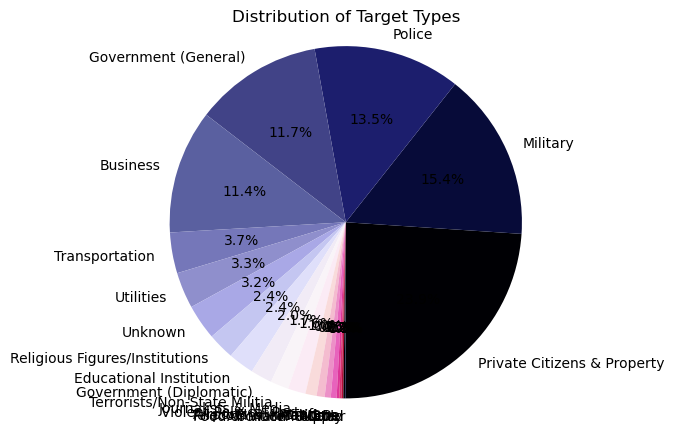

In [70]:
plt.figure(figsize=(5,5))
target_counts = df['Target_type'].value_counts()
colors = [
    "#000004", "#070b39", "#1c1e6d", "#414387", "#5a60a0",
    "#7577b9", "#8f8fcc", "#a9a8e6", "#c4c6f1", "#dfdffa",
    "#f1ebf6", "#f9f4f8", "#fbebf5", "#f9dbdb", "#f4bccf",
    "#ec90c7", "#e763bc", "#dd3497", "#d7306e", "#ae0e36"
]

plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=270, colors=colors)
plt.axis('equal')
plt.title('Distribution of Target Types')
plt.show()

<Figure size 500x400 with 0 Axes>

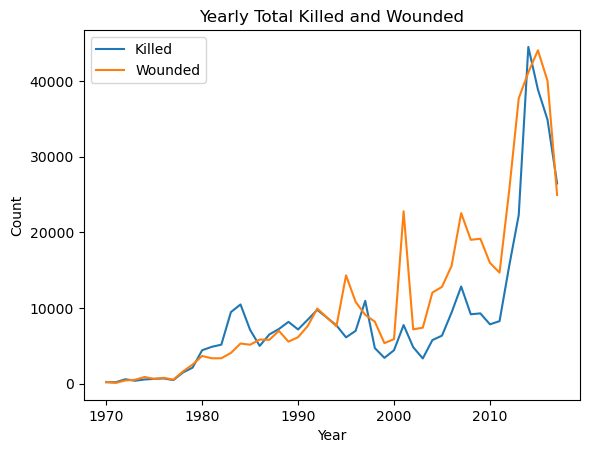

In [22]:
yearly_casualties = df.groupby('Year')[['Killed', 'Wounded']].sum()
plt.figure(figsize=(5, 4))
yearly_casualties.plot(kind='line')
plt.title('Yearly Total Killed and Wounded')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

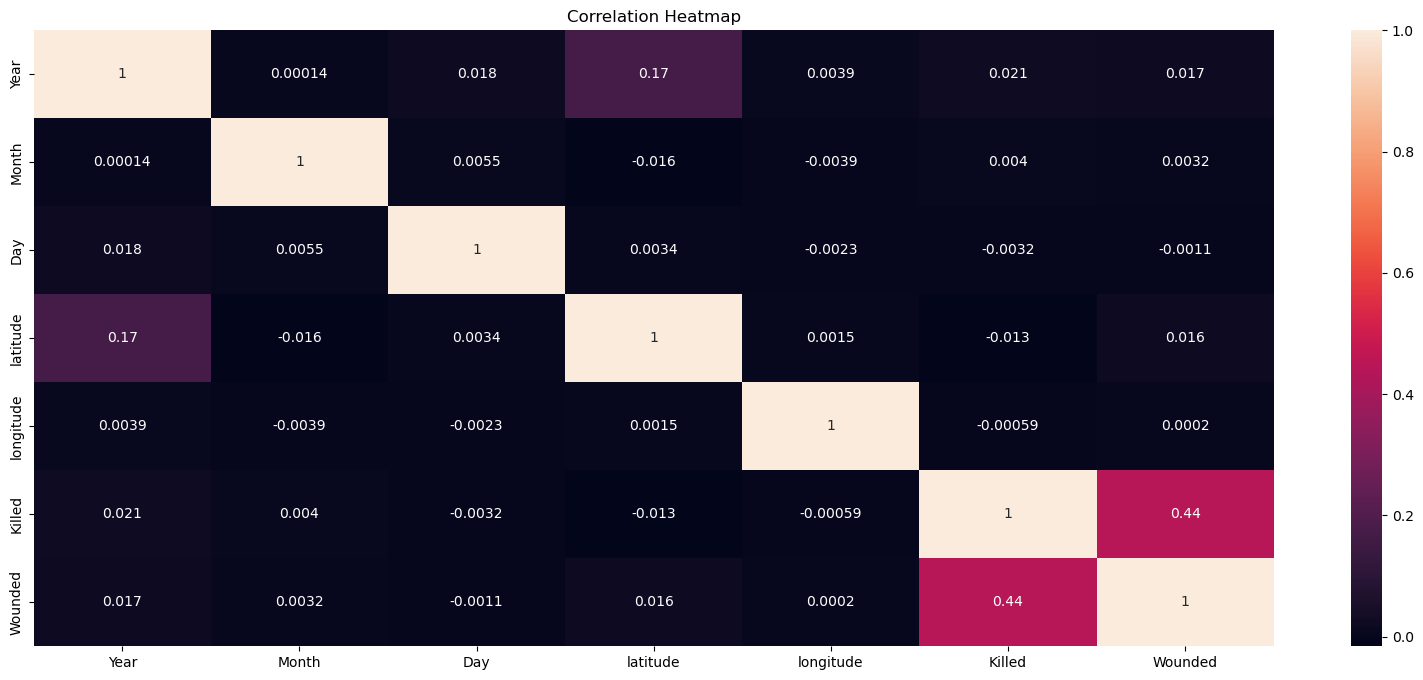

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket')
plt.title('Correlation Heatmap')
plt.show()

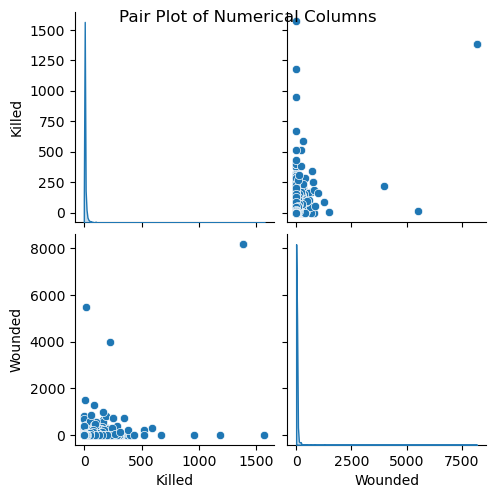

In [24]:
custom_palette = sns.color_palette("Set3")
sns.pairplot(data=df[['Killed', 'Wounded', 'Region', 'AttackType']], diag_kind='kde', palette=custom_palette)
plt.suptitle('Pair Plot of Numerical Columns')
plt.show()

In [27]:
df['K+W']=df['Killed']+df['Wounded']

In [32]:
dframe=df.sort_values(by='K+W',ascending=False)[:40]
dataf=dframe.pivot_table(index='Country',columns='Year',values='K+W')
dataf.fillna(0,inplace=True)

In [33]:
dataf

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,536.0,0.000000,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,1161.0,0.0,0.000000,0.0,0.000000,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,520.000000,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1005.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,702.0,0.0,833.333333,0.0,654.0,1064.333333,0.0,911.666667,0.0
Japan,0.0,0.0,0.0,507.0,3092.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4224.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


In [47]:
#66FF33','#40E200','#00C500','#00A900','#008D00','#007200','#005800','#003F00','#002600','#000000'
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00A900'],  [.6, '#007200'],  [1, '#003F00']]
heatmap = go.Heatmap(z=dataf.values, x=dataf.columns, y=dataf.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [46]:
df.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

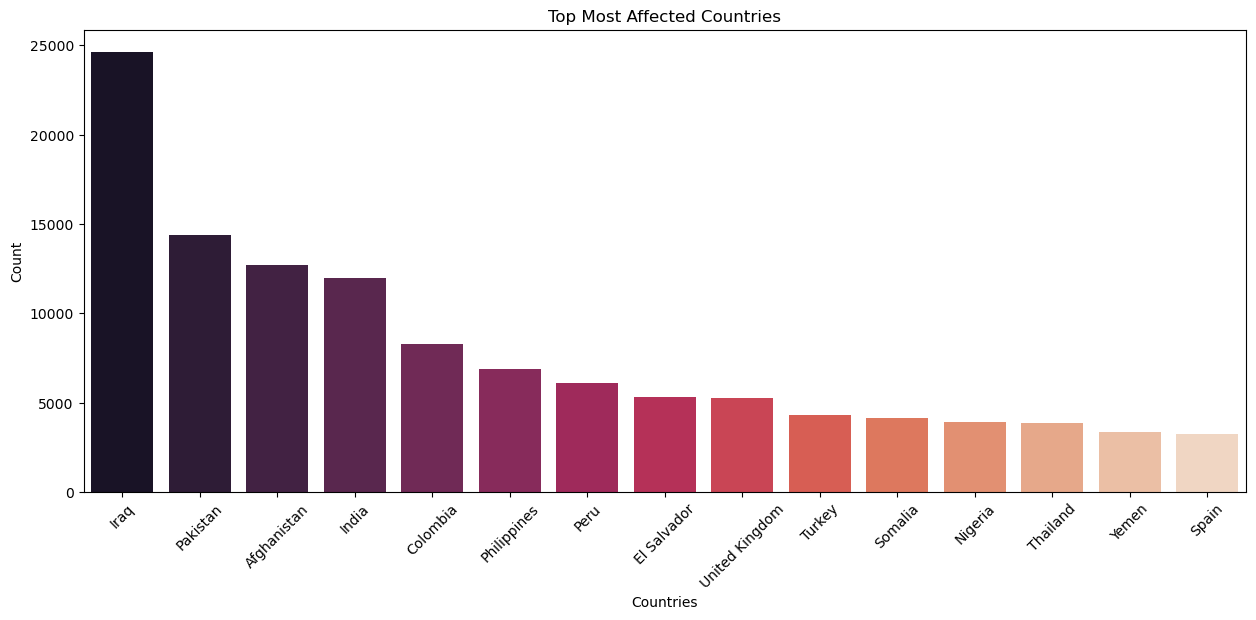

In [54]:
plt.subplots(figsize=(15, 6))
sns.barplot(x=df['Country'].value_counts()[:15].index,
            y=df['Country'].value_counts()[:15].values,
            palette='rocket')
plt.title('Top Most Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [57]:
df.Group.value_counts()[:15]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64

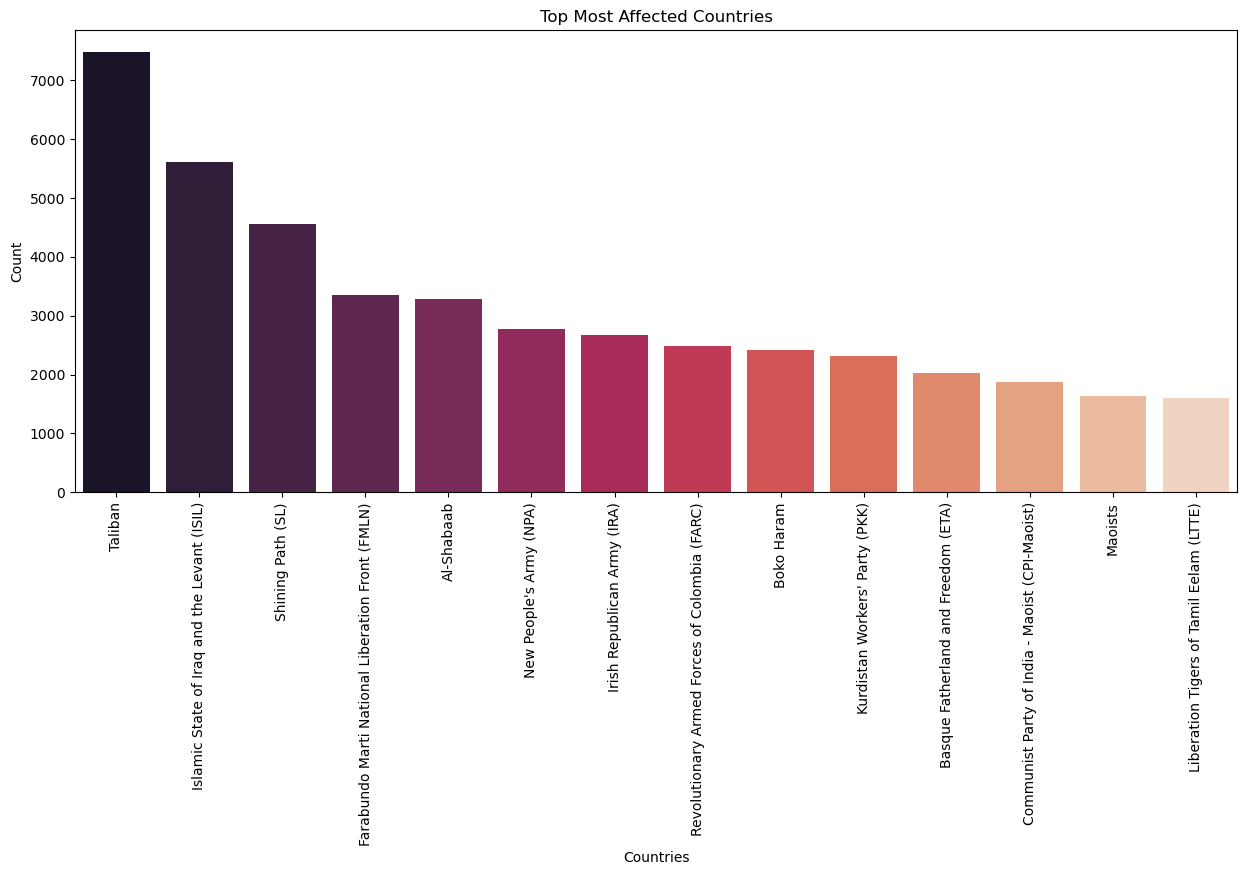

In [62]:
plt.subplots(figsize=(15, 6))
sns.barplot(x=df['Group'].value_counts()[1:15].index,
            y=df['Group'].value_counts()[1:15].values,
            palette='rocket')
plt.title('Top Most Affected Countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [64]:
KD=df.loc[:,'Killed']
print('Total people killed in Attacks:', int(sum(killData)))

Total people killed in Attacks: 411868


In [65]:
AD=df.loc[:,'AttackType']
AD=pd.concat([AD, KD], axis=1)

In [68]:
AD_Format=AD.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
AD_Format

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


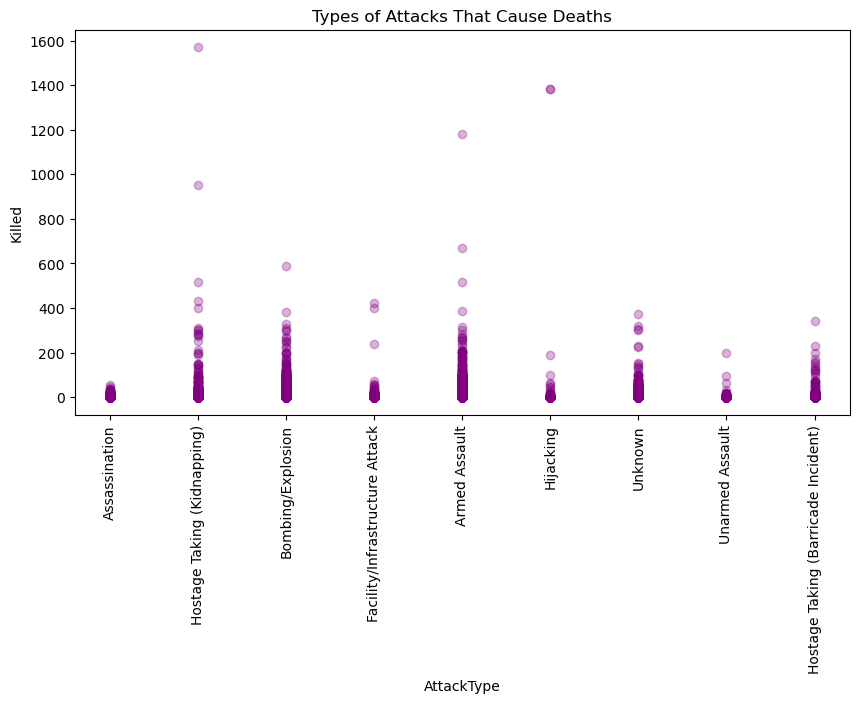

In [93]:
plt.figure(figsize=(10, 5))
plt.scatter(df['AttackType'], df['Killed'], c='purple', alpha=0.3)
plt.xlabel('AttackType')
plt.ylabel('Killed')
plt.xticks(rotation=90)
plt.title('Types of Attacks That Cause Deaths')
plt.show()

In [77]:
CD=df.loc[:,'Country']
CKD=pd.concat([CD, KD], axis=1)

In [80]:
CKD_Format=CKD.pivot_table(columns='Country', values='Killed', aggfunc='sum')
CKD_Format

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


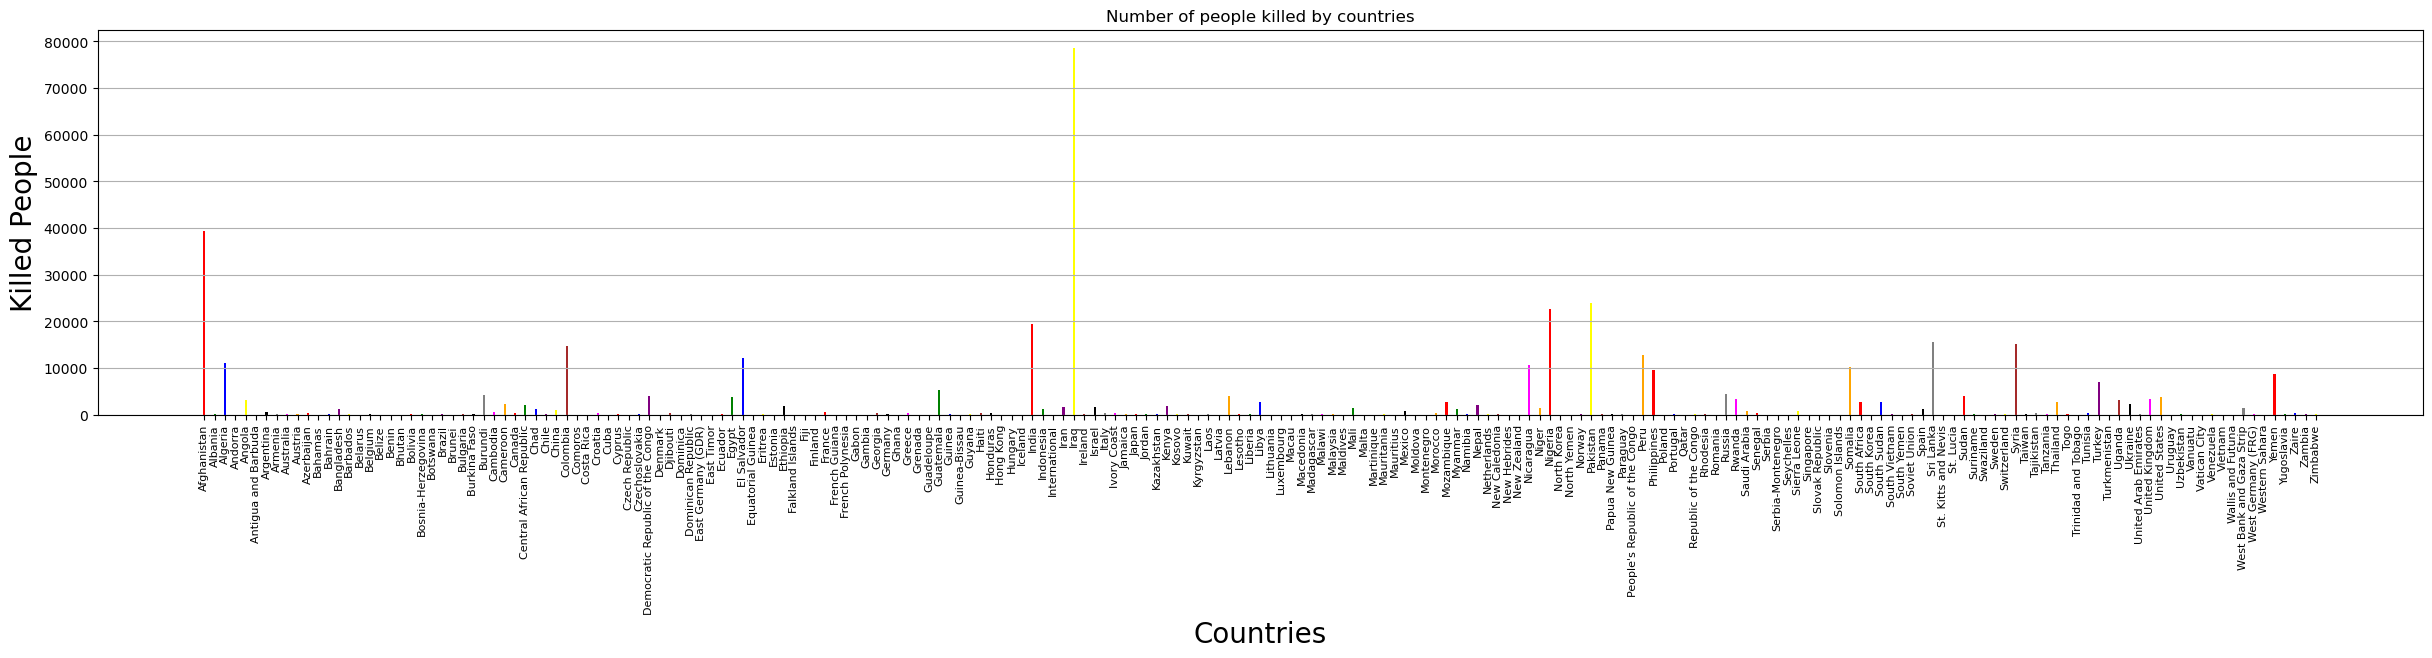

In [113]:
labels = CKD_Format.columns.tolist()
labels = labels[:206] #50 bar provides nice view
index = np.arange(len(labels))
values = transpoze.values.tolist()
values = values[:206]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=30
fig_size[1]=5
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.2)
plt.ylabel('Killed People')
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=8, rotation=90)
plt.title('Number of people killed by countries')
plt.show()